<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/Lecture-AI_programming/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week11

In [19]:
import torch
import torch.nn as n
import torchvision
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
)

### `MultiLabelSoftMarginLoss`
Multi-label Classification을 위한 loss function.
- 하나의 sample이 여러 개의 class에 동시에 속할 수 있는 classification.

In [ ]:
logits = torch.tensor([[0.5, -1.0, 3.0], [1.5, -2.0, 0.0]], requires_grad=True)
labels = torch.tensor([[1, 0, 1], [0, 1, 0]], dtype=torch.float)

weights = torch.tensor([0.5, 2.0, 1.5], dtype=torch.float) # class 별 중요도

loss_func = nn.MultiLabelSoftMarginLoss(weight=weights)

loss = loss_func(logits, labels)
print("Loss:", loss.item())

Loss: 1.1801210641860962


stable하지 않은 경우가 있음.

<hr>

## Iris Dataset

Iris Dataset은 1936년 영국의 통계학자인 Ronald A. Fisher가 처음 소개한 Dataset임.
이 Dataset은 세 가지 종류의 붓꽃(Iris Setosa, Iris Versicolour, Iris Virginica)의 sample data로 구성됨.
각 sample은 다음의 네 가지 특성(feature)을 가짐:

- 꽃받침 길이(Sepal Length)
- 꽃받침 너비(Sepal Width)
- 꽃잎 길이(Petal Length)
- 꽃잎 너비(Petal Width)
총 150개의 sample이 있으며, 각 sample은 위의 네 가지 특성과 함께 해당하는 꽃의 종류로 라벨링(labeling)되어 있음.

### Iris Dataset 불러오기

In [ ]:
# Iris 데이터셋 불러오기
iris = load_iris()

# 데이터셋 설명
print(iris.DESCR)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:

# 데이터셋을 판다스 데이터프레임으로 변환
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# 데이터프레임 출력
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


- 일반적으로 분산이 큰 데이터가 중요한 데이터일 가능성이 높음.
- std, min, max 등을 중요하게 볼 것.

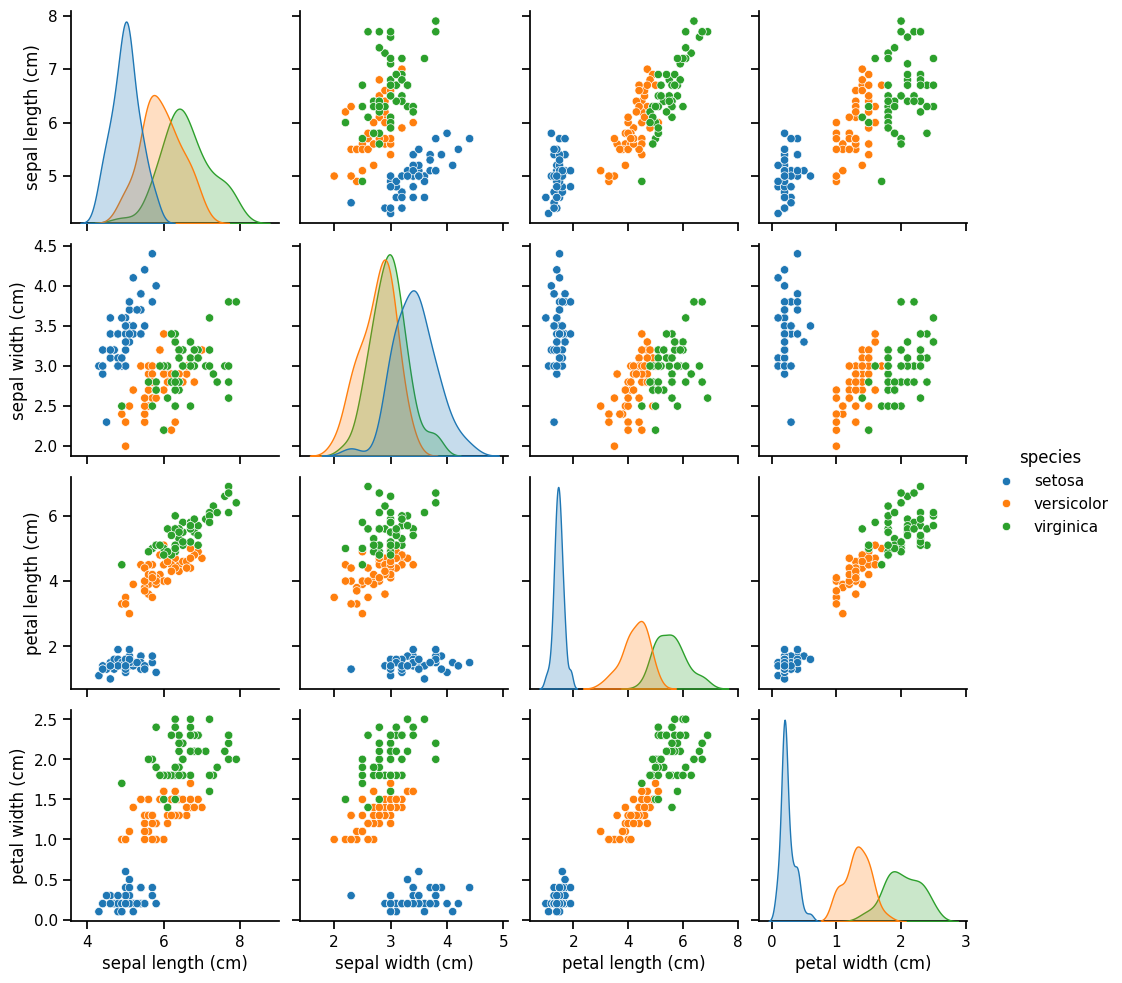

In [ ]:
# 종(species) 열을 문자열로 변환
ori_species = iris_df['species'].copy()

iris_df['species'] = iris_df['species'].apply(lambda x: iris.target_names[x])

# 페어플롯(pairplot) 시각화
# 기본 사이즈 설정
sns.pairplot(iris_df, hue='species')
plt.show()
iris_df['species']= ori_species # 원상복구


각각이 어떠한 관계를 가지고 있는지 확인

<hr>

# Dataset

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
dir(iris)

<class 'sklearn.utils._bunch.Bunch'>


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

# Exploratory Data Analysis (EDA)

탐색적 데이터 분석.

여기선 df를 이용해 간단히 살펴본다.

In [5]:
from IPython import display
display.Markdown(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

The famous Iris database, first used by Sir R.A. Fisher. The dataset is taken
from Fisher's paper. Note that it's the same as in R, but not as in the UCI
Machine Learning Repository, which has two wrong data points.

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

.. topic:: References

   - Fisher, R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda, R.O., & Hart, P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

In [6]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [9]:
df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [10]:
np.unique(iris.target_names) # 0: benign, 1: malignant

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Data Processing

In [11]:
x_raw = iris.data
y_raw = iris.target

print(f'{type(x_raw)=}:{x_raw.shape=}')
print(f'{type(y_raw)=}:{y_raw.shape=}')

type(x_raw)=<class 'numpy.ndarray'>:x_raw.shape=(150, 4)
type(y_raw)=<class 'numpy.ndarray'>:y_raw.shape=(150,)


In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x_raw, y_raw, test_size = .2,
    stratify=y_raw,
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size = .2,
    stratify=y_train,
)

print(len(x_train), len(x_val), len(x_test))

96 24 30


In [15]:
test_r = np.unique(y_test, return_counts = True)
train_r = np.unique(y_train, return_counts = True)
val_r = np.unique(y_val, return_counts = True)

print("test's iris ratio : ", np.round( test_r[1][1]/np.sum( test_r[1]),2))
print("train's iris ratio: ", np.round(train_r[1][1]/np.sum(train_r[1]),2))
print("val's iris ratio. : ", np.round(  val_r[1][1]/np.sum(  val_r[1]),2))

test's cancer ratio :  0.33
train's cancer ratio:  0.33
val's cancer ratio. :  0.33


np.unique에 대해서 추가로 공부할 것.

In [16]:
print(f' {x_test.shape=}\n{x_train.shape=}\n{  x_val.shape=}')
print(f' {y_test.shape=}\n{y_train.shape=}\n{  y_val.shape=}')

 x_test.shape=(30, 4)
x_train.shape=(96, 4)
  x_val.shape=(24, 4)
 y_test.shape=(30,)
y_train.shape=(96,)
  y_val.shape=(24,)


# Dataset and DataLoader

In [ ]:
from torch.utils.data import Dataset
import torch
import torch.nn as nn

class IrisDataset (Dataset):

  def __init__(self, r_vec, r_label):
    self.data = torch.tensor(r_vec).float()
    self.label = torch.tensor(r_label).long()

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx],self.label[idx]

train_ds = IrisDataset(x_train,y_train)
val_ds = IrisDataset(x_val, y_val)
test_ds = IrisDataset(x_test, y_test)

In [ ]:
next(iter(train_ds))

(tensor([5.0000, 3.4000, 1.6000, 0.4000]), tensor(0))

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset = train_ds,
    batch_size = 32,
    shuffle = True,
)
valid_loader = DataLoader(
    dataset = val_ds,
    batch_size = 32,
    shuffle = False,
)
test_loader = DataLoader(
    dataset = test_ds,
    batch_size = 32,
    shuffle = False,
)

# Train Loop

In [23]:
def train_loop (
    n_epoch,
    train_ds, val_ds,
    model, optimizer, loss_fnc,
    device = 'cpu',):

  log_hist = torch.zeros([0,3]).to(device)
  for epoch in range(n_epoch):
    # print(f'\r{epoch:6>}', end='')

    model = model.to(device)
    model.train()

    for x_tensor, y_tensor in train_ds:

      x_tensor.to(device)
      y_tensor.to(device)

      y_pred = model(x_tensor)
      # print(y_tensor.shape)
      loss_train = loss_fnc(y_pred,y_tensor)

      if torch.isinf(loss_train):
        print(f'Error: loss is infinity!')
        break

      optimizer.zero_grad()
      loss_train.backward()
      optimizer.step()

    with torch.no_grad():
      for x_tensor, y_tensor in val_ds:
        x_tensor = x_tensor.to(device)
        y_tensor = y_tensor.to(device)
        model.eval()
        pred = model(x_tensor)
        loss_val = loss_fnc(pred, y_tensor)


    if epoch % 200 == 0:
      tmp = torch.tensor([epoch, loss_train.item(), loss_val.item()]).to(log_hist.device)
      # print(tmp)
      log_hist = torch.concat( (log_hist, tmp.reshape(1,-1)), dim=0 )
      print(f'{epoch} Epoch / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

    if epoch == n_epoch:
      print(f'{epoch} Epoch / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

  return model,log_hist


# Model

In [ ]:
class SimpleModel(nn.Module):

  def __init__(self, n_feature, n_classes):
    super().__init__()

    self.l0 = nn.Linear(n_feature, 16)
    self.a0 = nn.ReLU()
    self.l1 = nn.Linear(16,16)
    self.a1 = nn.ReLU()
    self.lf = nn.Linear(16,n_classes)
    self.out = nn.Softmax(dim=-1)

  def forward(self, x):
    x = self.l0(x)
    x = self.a0(x)
    x = self.l1(x)
    x = self.a1(x)
    x = self.lf(x)
    x = self.out(x)

    return x

In [ ]:
# input vector의 number of components확인.
n_features = x_raw.shape[-1]
print(f'{n_features    =}')
# output vector의 number of components확인.
n_classes = len(np.unique(y_raw))
print(f'{n_classes     =}')


# random한 input vector 5개에 대한
# 모델의 예측 결과를 확인하여
# 모델의 i/o 의 shape 확인.
model = SimpleModel(n_features, n_classes)
x = torch.randn( (5, n_features) )
print(f'{x.shape       =}')
print(f'{model(x).shape=}')

n_features    =4
n_classes     =3
x.shape       =torch.Size([5, 4])
model(x).shape=torch.Size([5, 3])


# Training

In [ ]:
# device 설정.
device = (
      "cuda" if torch.cuda.is_available()
      else "mps"
      if torch.backends.mps.is_available()
      else "cpu"
  )
print(f"{device=}")


device='cpu'


In [ ]:
# number of epochs
n_epoch = 7000
# learning ratio
lr = 4e-4

# loss function 설정
loss_fnc  = nn.CrossEntropyLoss()
# 모델 생성 및 초기화
model = SimpleModel(n_features, n_classes)
# optimizer 생성 및 초기화
# optimizer = torch.optim.SGD(model.parameters(), lr=lr)
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # recommanded

m, h = train_loop (
    n_epoch,
    train_loader, valid_loader,
    model, optimizer, loss_fnc,
    device = device)


0 Epoch / loss 1.1368 / val_loss 1.1334
200 Epoch / loss 0.8472 / val_loss 0.8025
400 Epoch / loss 0.5965 / val_loss 0.6165
600 Epoch / loss 0.6071 / val_loss 0.5897
800 Epoch / loss 0.5784 / val_loss 0.5827
1000 Epoch / loss 0.5589 / val_loss 0.5785
1200 Epoch / loss 0.5873 / val_loss 0.5759
1400 Epoch / loss 0.5692 / val_loss 0.5734
1600 Epoch / loss 0.5705 / val_loss 0.5708
1800 Epoch / loss 0.6066 / val_loss 0.5693
2000 Epoch / loss 0.6023 / val_loss 0.5670
2200 Epoch / loss 0.5856 / val_loss 0.5649
2400 Epoch / loss 0.5841 / val_loss 0.5627
2600 Epoch / loss 0.5936 / val_loss 0.5607
2800 Epoch / loss 0.5692 / val_loss 0.5597
3000 Epoch / loss 0.5698 / val_loss 0.5582
3200 Epoch / loss 0.5661 / val_loss 0.5571
3400 Epoch / loss 0.5845 / val_loss 0.5561
3600 Epoch / loss 0.5853 / val_loss 0.5554
3800 Epoch / loss 0.5616 / val_loss 0.5548
4000 Epoch / loss 0.5527 / val_loss 0.5544
4200 Epoch / loss 0.5719 / val_loss 0.5539
4400 Epoch / loss 0.5521 / val_loss 0.5536
4600 Epoch / loss 

# Learning Curve

In [ ]:
h

tensor([[0.0000e+00, 1.1368e+00, 1.1334e+00],
        [2.0000e+02, 8.4715e-01, 8.0249e-01],
        [4.0000e+02, 5.9649e-01, 6.1649e-01],
        [6.0000e+02, 6.0712e-01, 5.8968e-01],
        [8.0000e+02, 5.7840e-01, 5.8270e-01],
        [1.0000e+03, 5.5887e-01, 5.7850e-01],
        [1.2000e+03, 5.8726e-01, 5.7590e-01],
        [1.4000e+03, 5.6920e-01, 5.7339e-01],
        [1.6000e+03, 5.7049e-01, 5.7084e-01],
        [1.8000e+03, 6.0660e-01, 5.6933e-01],
        [2.0000e+03, 6.0226e-01, 5.6701e-01],
        [2.2000e+03, 5.8564e-01, 5.6489e-01],
        [2.4000e+03, 5.8406e-01, 5.6271e-01],
        [2.6000e+03, 5.9358e-01, 5.6073e-01],
        [2.8000e+03, 5.6918e-01, 5.5969e-01],
        [3.0000e+03, 5.6983e-01, 5.5821e-01],
        [3.2000e+03, 5.6609e-01, 5.5715e-01],
        [3.4000e+03, 5.8455e-01, 5.5612e-01],
        [3.6000e+03, 5.8531e-01, 5.5535e-01],
        [3.8000e+03, 5.6159e-01, 5.5483e-01],
        [4.0000e+03, 5.5268e-01, 5.5436e-01],
        [4.2000e+03, 5.7191e-01, 5

(35, 3)


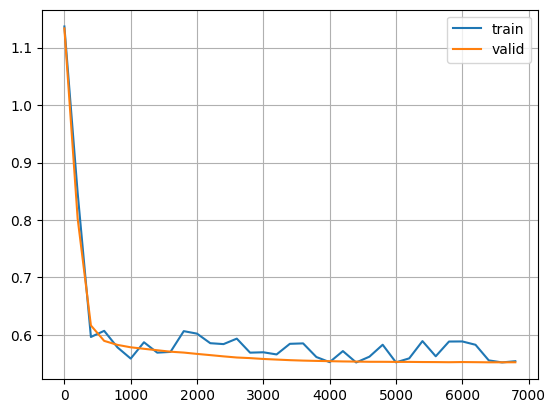

In [ ]:
import matplotlib.pyplot as plt

h0 = h.detach().numpy()
print(h0.shape)
plt.plot(h0[:,0], h0[:,1], label='train')
plt.plot(h0[:,0], h0[:,2], label='valid')
plt.legend()
plt.grid()
plt.show()

# Test

In [ ]:
f_m = model.cpu()
f_m.eval()
with torch.no_grad():
  is_first = True
  for x_tensor, y_tensor in test_loader:
    x_tensor = x_tensor.cpu()
    y_tensor = y_tensor.cpu()
    pred_prob = f_m(x_tensor)
    pred = torch.argmax(pred_prob, dim=-1) # class 수 만큼 나오므로 가장 큰 확률의 index를 얻어야함.

    # print(y_tensor.numpy().shape)
    if is_first:
      test_pred = pred.numpy().copy()
      test_label = y_tensor.numpy().copy()
      is_first = False
    else:
      test_label = np.concatenate((test_label, y_tensor.numpy()), axis=0)
      test_pred = np.concatenate((test_pred, pred.numpy()), axis=0)

print(test_label.shape, test_label.dtype)
print(test_pred.shape, test_pred.dtype)

(30,) int64
(30,) int64


In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
)
pred = test_pred
label = test_label

print('Confusion Matrix\n',
      str(confusion_matrix(label,pred))
      )
print(f'Precision           :{np.round(precision_score(label,pred,average=None),2)}')
print(f'Precision (macro)   :{np.round(precision_score(label,pred,average="macro"),2)}')
print(f'Precision (micro)   :{np.round(precision_score(label,pred,average="micro"),2)}')
print(f'Precision (weighted):{np.round(precision_score(label,pred,average="weighted"),2)}')
print(f'Recall              :{np.round(recall_score(label,pred,average=None),2)}')
print(f'Recall    (macro)   :{np.round(recall_score(label,pred,average="macro"),2)}')
print(f'Recall    (micro)   :{np.round(recall_score(label,pred,average="micro"),2)}')
print(f'Recall    (weighted):{np.round(recall_score(label,pred,average="weighted"),2)}')
print(f'F1-score            :{np.round(f1_score(label,pred,average=None),2)}')
print(f'F1-score  (macro)   :{np.round(f1_score(label,pred,average="macro"),2)}')
print(f'F1-score  (micro)   :{np.round(f1_score(label,pred,average="micro"),2)}')
print(f'F1-score  (weighted):{np.round(f1_score(label,pred,average="weighted"),2)}')
print(f'F2-score            :{np.round(fbeta_score(label,pred,beta=2,average=None),2)}')
print(f'F2-score  (macro)   :{np.round(fbeta_score(label,pred,beta=2,average="macro"),2)}')
print(f'F2-score  (micro)   :{np.round(fbeta_score(label,pred,beta=2,average="micro"),2)}')
print(f'F2-score  (weighted):{np.round(fbeta_score(label,pred,beta=2,average="weighted"),2)}')



Confusion Matrix
 [[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]
Precision           :[1.   1.   0.83]
Precision (macro)   :0.94
Precision (micro)   :0.93
Precision (weighted):0.94
Recall              :[1.  0.8 1. ]
Recall    (macro)   :0.93
Recall    (micro)   :0.93
Recall    (weighted):0.93
F1-score            :[1.   0.89 0.91]
F1-score  (macro)   :0.93
F1-score  (micro)   :0.93
F1-score  (weighted):0.93
F2-score            :[1.   0.83 0.96]
F2-score  (macro)   :0.93
F2-score  (micro)   :0.93
F2-score  (weighted):0.93


- gpu
- feature scaling
- model saving

<hr>

## CIFAR-10
### Data
- 이미지 크기: 32x32 Pixels
- channels: 컬러 이미지 (RGB, 3채널)
- class: 10개의 상호 배타적. Multi-classes Classification 을 위한 Dataset
- class별 sample 수: 각 class마다 6,000장의 image sample (전체 60,000장)

### Class
- 비행기 (airplane)
- 자동차 (automobile)
- 새 (bird)
- 고양이 (cat)
- 사슴 (deer)
- 개 (dog)
- 개구리 (frog)
- 말 (horse)
- 배 (ship)
- 트럭 (truck)

### 데이터 분할:
- 훈련 데이터: 50,000장
- 테스트 데이터: 10,000장
